# Corpus Analysis


For this exercise, we have chosen a German corpus. This corpus was downloaded from Leipzig Corpora Collection, and has 30000 sentences that were taken from news websites in 2022. (https://downloads.wortschatz-leipzig.de/corpora/deu_news_2022_30K.tar.gz)


---



1) Install the needed packages NLTK, matplotlib, wordcloud. Choose the language you want to analyze. Check whether NLTK supports this language.

2) Install other language packages of NLTK and corpora if necessary.

In [ ]:
import nltk
import fileinput, sys
import matplotlib
import matplotlib.pyplot as plt
import string
import spacy
import spacy.cli
from nltk.corpus import PlaintextCorpusReader
from nltk.text import Text
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud

spacy.cli.download("de_core_news_md")

nltk.download('stopwords')

✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_md')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

3) Choose a large corpus (at least 1M, better 10 MB, e.g. Wikipedia, Twitter, see slides spr-04-corpus-words.pdf) that is available in the chosen language. Load it in NLTK and use it for the following exercises. Please inform the lecturer about the chosen corpus via e-mail.

Important: Depending on the corpus, you often have to do a preprocessing step before you continue doing the following tasks. Preprocessing may include case-folding, removing line-numbers or other characters, etc.

In [ ]:
FILE_NAME = "deu_news_2022_30K-sentences.txt"

# remove line numbers
for line in fileinput.input([FILE_NAME], inplace=True):
  separate_line_number = line.split("\t")
  new_line = " ".join(separate_line_number[1:])
  sys.stdout.write(new_line)

In [ ]:
# load corpus
corpus_root = '/content/'
deu_news = PlaintextCorpusReader(corpus_root, FILE_NAME)
words = deu_news.words(FILE_NAME)

In [ ]:
# lowercase all words
words = [word.lower() for word in words]
text = Text(words)

# remove numbers
words = [word for word in words if not word.isnumeric()]

# remove punctuations
words = [word for word in words if word not in string.punctuation]

# remove other characters
words = [word for word in words if word.isalpha()]

4) Calculate the lexical richness of the selected corpus.

In [ ]:
def lexical_diversity(text):
  return len(set(text)) / len(text)

lexical_diversity(words)

0.1330847200390265

5) Plot the character distribution of your selected corpus.

[('e', 435630), ('n', 267135), ('i', 214395), ('r', 202524), ('t', 170860), ('s', 170017), ('a', 162250), ('d', 128367), ('h', 111561), ('u', 102038), ('l', 99560), ('g', 80924), ('m', 74205), ('o', 73962), ('c', 72597), ('b', 54576), ('f', 48737), ('k', 40685), ('w', 39569), ('z', 33860), ('p', 28313), ('v', 24980), ('ü', 17428), ('ä', 14742), ('ö', 7308)]


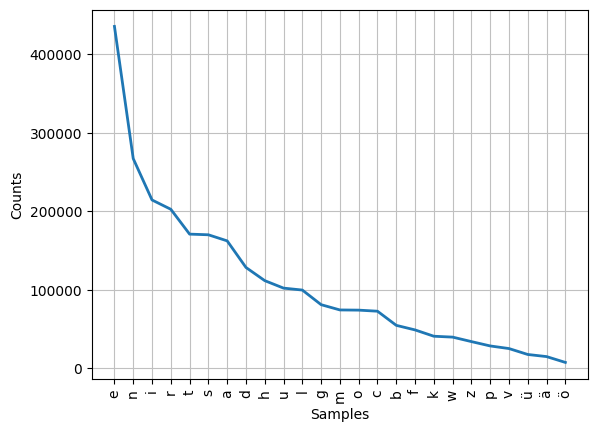

In [ ]:
text2 = deu_news.raw()
fd = nltk.FreqDist(ch.lower() for ch in text2 if ch.isalpha())
print(fd.most_common(25))
fd.plot(25)
plt.show()

6) Plot the word distribution of the 20 most often used words of your selected corpus (with stopwords).

[('die', 16407), ('der', 15624), ('und', 10466), ('in', 9013), ('das', 5592), ('den', 5294), ('mit', 4666), ('zu', 4321), ('von', 4236), ('im', 4132), ('für', 3933), ('auf', 3905), ('ist', 3809), ('es', 3610), ('ein', 3529), ('sich', 3489), ('auch', 3153), ('eine', 3098), ('nicht', 3082), ('dem', 2954)]


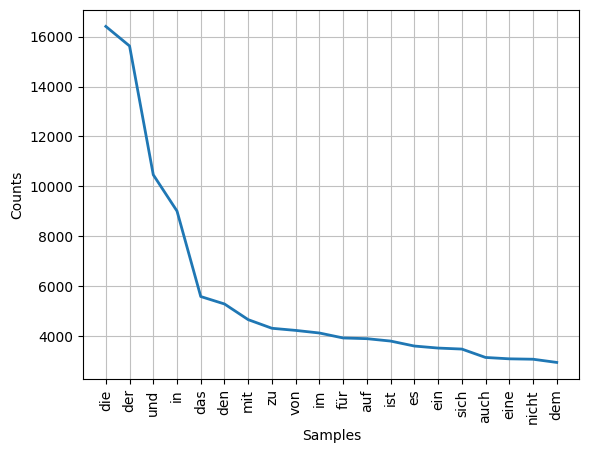

In [ ]:
fd = nltk.FreqDist(words)
print(fd.most_common(20))
fd.plot(20)
plt.show()

7) Plot the dispersion plot of the 5 most often used words.

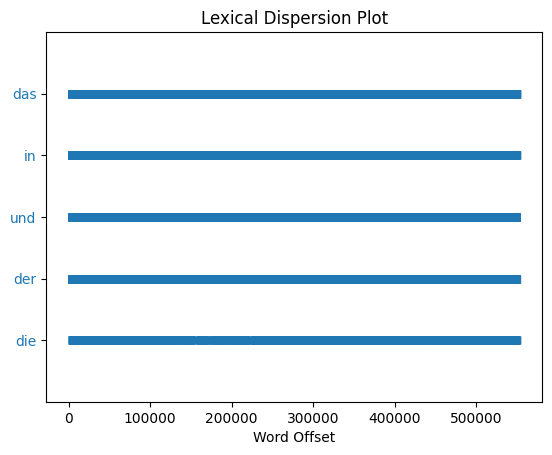

In [ ]:
text.dispersion_plot(['die', 'der', 'und', 'in', 'das'])

8) Find the longest word in the text. Select an algorithm for splitting words (also called word break / split algorithm) and split the word into subwords.

In [ ]:
longest_word = max(words, key=len)
print("Longest word:")
print(longest_word)
print("Subwords:")
longest_word_char = list(longest_word)

l = 0
for i in range(len(longest_word)):

  if (l >= (len(longest_word)-1)):
    break

  char_list = []
  for k in range(len(longest_word_char)):
    if k >= l:
      char_list.append(longest_word_char[k])

  new_list = [word for word in words if word.startswith(char_list[0])]
  new_list = [word for word in new_list if len(word) <= len(char_list)]

  if (new_list.count(longest_word) > 0):
      new_list.remove(longest_word)

  new_word = max(new_list, key=len)
  char_list_aux = list(new_word)

  same = False
  while (same == False):
    if (len(new_list) == 0):
      same = True
      new_word = ""
    else:
      for j in range(len(new_word)):
        flag = True
        if (char_list_aux[j] != char_list[j]):
          new_list.remove(new_word)
          new_word = max(new_list, key=len)
          char_list_aux = list(new_word)
          flag = False
          break

      if (flag):
        same = True

  if (new_word != ""):
    print(new_word)
    l += len(new_word)
  else:
    l += 1

Longest word:
korruptionsuntersuchungendisziplinarkommission
Subwords:
korruptions
untersuchungen
disziplinar
kommission


9) Find a short sentence with 5 words (plus/minus 1). Create a context-free grammar for the sentence. The grammar shall show the syntactical structure of the sentence, so the terminal symbols shall be words.

In [ ]:
sentence = 'Der Eintritt kostet neun Euro'.split()

german_grammar = nltk.CFG.fromstring("""
S -> NG VG CG
NG -> Art N
VG -> V
CG -> Num N
Art -> 'Der'
N -> 'Eintritt' | 'Euro'
V -> 'kostet'
Num -> 'neun'
""")

parser = nltk.ChartParser(german_grammar)
for tree in parser.parse(sentence):
  print(tree)

(S
  (NG (Art Der) (N Eintritt))
  (VG (V kostet))
  (CG (Num neun) (N Euro)))


10) Select a suitable stemmer and stem every word in the sentence found with part 9.

In [ ]:
stemmer = SnowballStemmer("german")
stems = [stemmer.stem(word) for word in sentence]
print(' '.join(stems))

der eintritt kostet neun euro


11) Find a lemmatizer for the language and lemmatize every word in the sentence.

In [ ]:
nlp = spacy.load('de_core_news_md')
doc = nlp('Der Eintritt kostet neun Euro')
result = ' '.join([x.lemma_ for x in doc])
print(result)

der Eintritt kosten neun Euro


12) Remove stopwords and repeat exercises 6+7 (word distribution and dispersion plot).

In [ ]:
# remove stopwords
german_stopwords = set(stopwords.words('german'))
words = [word for word in words if word not in german_stopwords]

[('mehr', 1051), ('wurde', 892), ('sei', 844), ('euro', 643), ('zwei', 640), ('schon', 622), ('prozent', 614), ('gibt', 585), ('menschen', 573), ('seit', 557), ('jahr', 542), ('beim', 539), ('sagte', 534), ('immer', 515), ('jahren', 499), ('bereits', 487), ('ukraine', 474), ('ab', 455), ('dabei', 451), ('viele', 448)]


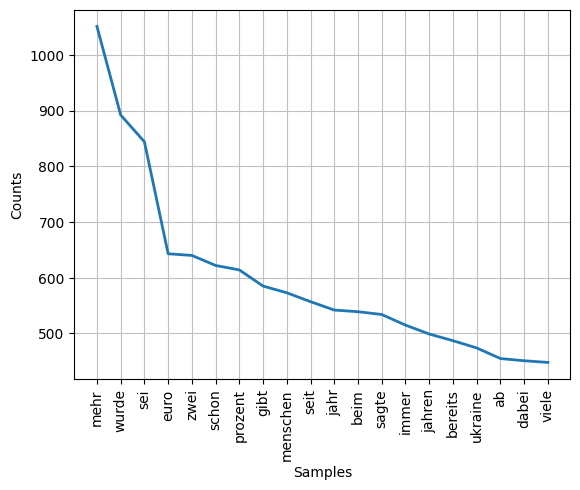

In [ ]:
# word distribution
fd = nltk.FreqDist(words)
print(fd.most_common(20))
fd.plot(20)
plt.show()

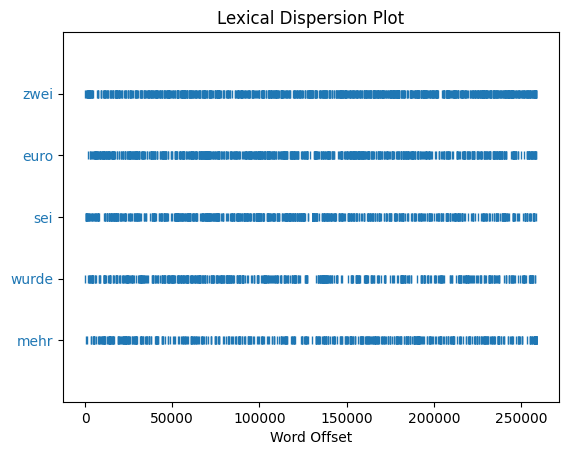

In [ ]:
# dispersion plot
text = Text(words)
text.dispersion_plot(['mehr', 'wurde', 'sei', 'euro', 'zwei'])

13) Print a wordcloud without your stopwords.

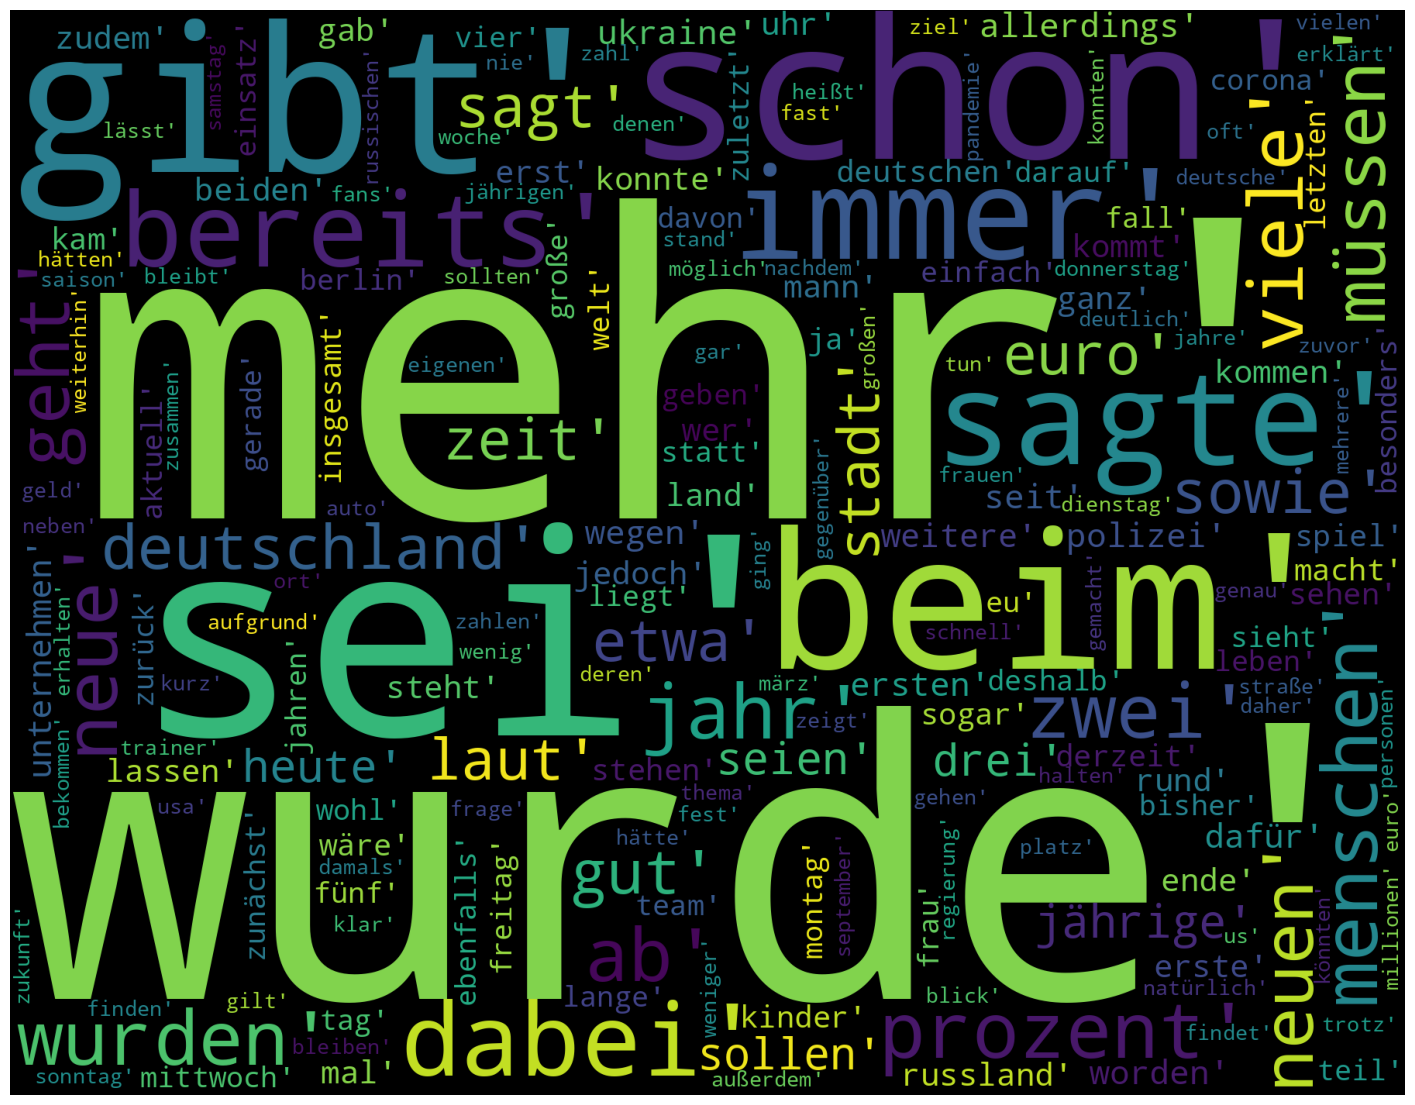

In [ ]:
plt.figure(figsize=(18, 18))
wordcloud = WordCloud(width=1800, height=1400).generate(str(words))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()